**Required libraries**


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import os


**Checking if the dataset is balanced**

In [2]:
cat_count = len(os.listdir("D:\PrectisePython\Deep_learning\CNN\cats_vs_dogs_dataset\cat"))
dog_count = len(os.listdir("D:\PrectisePython\Deep_learning\CNN\cats_vs_dogs_dataset\dog"))
print("Cats count:", cat_count)
print("Dogs count:", dog_count)


Cats count: 10832
Dogs count: 10784


**Differentiating as train and validation data**

In [5]:
img_size = (128, 128)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "D:\PrectisePython\Deep_learning\CNN\cats_vs_dogs_dataset",
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="int"
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "D:\PrectisePython\Deep_learning\CNN\cats_vs_dogs_dataset",
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="int"
)
class_names = train_ds.class_names
print(class_names) 
class_names = val_ds.class_names
print(class_names)


Found 21616 files belonging to 2 classes.
Using 17293 files for training.
Found 21616 files belonging to 2 classes.
Using 4323 files for validation.
['cat', 'dog']
['cat', 'dog']


**Builiding neural network**

In [ ]:
model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(128, 128, 3)),
    
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),  # 25% dropout

    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),

    layers.Flatten(),

    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


**Compiling and fitin the model**

In [7]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15  #incraese the epochs to have better accuracy
)



Epoch 1/15
541/541 ━━━━━━━━━━━━━━━━━━━━ 130s 237ms/step - accuracy: 0.5065 - loss: 0.6958 - val_accuracy: 0.4920 - val_loss: 0.6932
Epoch 2/15
541/541 ━━━━━━━━━━━━━━━━━━━━ 101s 186ms/step - accuracy: 0.5397 - loss: 0.6865 - val_accuracy: 0.6583 - val_loss: 0.6216
Epoch 3/15
541/541 ━━━━━━━━━━━━━━━━━━━━ 106s 196ms/step - accuracy: 0.6459 - loss: 0.6239 - val_accuracy: 0.7025 - val_loss: 0.5722
Epoch 4/15
541/541 ━━━━━━━━━━━━━━━━━━━━ 132s 244ms/step - accuracy: 0.7003 - loss: 0.5651 - val_accuracy: 0.7213 - val_loss: 0.5425
Epoch 5/15
541/541 ━━━━━━━━━━━━━━━━━━━━ 128s 237ms/step - accuracy: 0.7296 - loss: 0.5361 - val_accuracy: 0.7636 - val_loss: 0.4993
Epoch 6/15
541/541 ━━━━━━━━━━━━━━━━━━━━ 114s 210ms/step - accuracy: 0.7510 - loss: 0.5008 - val_accuracy: 0.7876 - val_loss: 0.4608
Epoch 7/15
541/541 ━━━━━━━━━━━━━━━━━━━━ 139s 256ms/step - accuracy: 0.7667 - loss: 0.4745 - val_accuracy: 0.8096 - val_loss: 0.4425
Epoch 8/15
541/541 ━━━━━━━━━━━━━━━━━━━━ 138s 254ms/step - accuracy: 0.7850 -

**Plotting how accuracy and loss changes of both val and train**

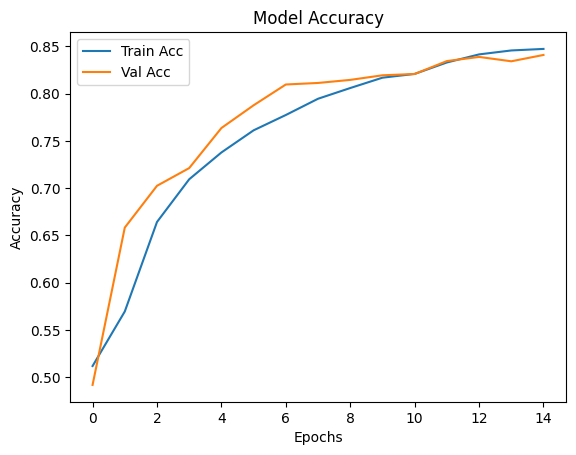

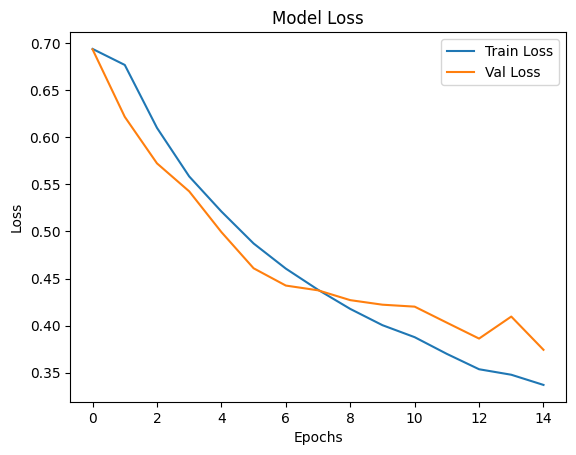

In [8]:
# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


**Get an image from web and it will predict**

In [ ]:

while True:

    url = input("Enter the URL of the image of either cat or dog::")
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.resize((128, 128))
    img_array = keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    prediction = model.predict(img_array)
    print("prediction :" ,prediction)

    if prediction > 0.5:
       print("The given image is a dog..")
    else:
       print("The given image is a cat..")

    choice = input("If u want to check for another image enter 'YES'::")
    if choice.lower() != 'yes':
        break
    

# For the below outputs the images i have uploaded are::
#    1.https://static.vecteezy.com/system/resources/previews/005/857/332/non_2x/funny-portrait-of-cute-corgi-dog-outdoors-free-photo.jpg
#    2.https://th.bing.com/th/id/OIP.-L5jsWYPOlSBlabgulN0iAHaEK?w=318&h=180&c=7&r=0&o=7&dpr=1.3&pid=1.7&rm=3
#    3.https://th.bing.com/th/id/OIP.cvg_MdgYsY9-fKD5eV8SpgHaE5?w=289&h=191&c=7&r=0&o=7&dpr=1.3&pid=1.7&rm=3
#    4.https://th.bing.com/th/id/OIP.nTfBuWtmFU8od_kwsE-T5AHaEo?w=285&h=180&c=7&r=0&o=7&dpr=1.3&pid=1.7&rm=3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
prediction : [[0.8832017]]
The given image is a dog..
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
prediction : [[0.7920895]]
The given image is a dog..
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
prediction : [[0.06258366]]
The given image is a cat..
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
prediction : [[0.4570094]]
The given image is a cat..
